In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..")
from utils import *
from linear_regression import *
from svm import *
from softmax import *
from features import *
from kernel import *

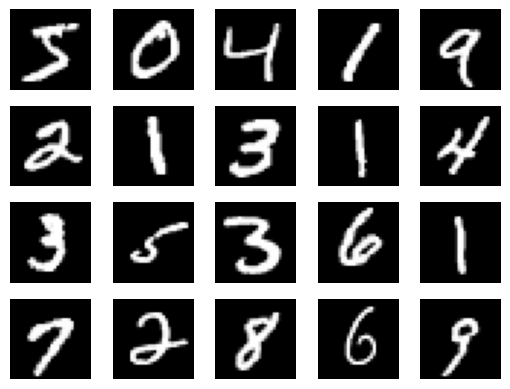

In [2]:
#######################################################################
# 1. Introduction
#######################################################################

# Load MNIST data:
train_x, train_y, test_x, test_y = get_MNIST_data()
# Plot the first 20 images of the training set.
plot_images(train_x[0:20, :])


In [3]:
#######################################################################
# 2. Linear Regression with Closed Form Solution
#######################################################################

# TODO: first fill out functions in linear_regression.py, otherwise the functions below will not work


def run_linear_regression_on_MNIST(lambda_factor=[1,0.1,0.01]):
    """
    Trains linear regression, classifies test data, computes test error on test set

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_x_bias = np.hstack([np.ones([train_x.shape[0], 1]), train_x])
    test_x_bias = np.hstack([np.ones([test_x.shape[0], 1]), test_x])
    # theta = closed_form(train_x_bias, train_y, lambda_factor)
    # test_error = compute_test_error_linear(test_x_bias, test_y, theta)
    # return test_error
    if isinstance(lambda_factor, list):
        # If lambda_factor is a list, iterate over the lambda values
        test_errors = []
        for lambda_val in lambda_factor:
            theta = closed_form(train_x_bias, train_y, lambda_val)
            test_error = compute_test_error_linear(test_x_bias, test_y, theta)
            test_errors.append(test_error)
        return test_errors
    else:
        # If lambda_factor is a single value, compute test error for that lambda value
        theta = closed_form(train_x_bias, train_y, lambda_factor)
        test_error = compute_test_error_linear(test_x_bias, test_y, theta)
        return test_error


# Don't run this until the relevant functions in linear_regression.py have been fully implemented.
print('Linear Regression test_error =', run_linear_regression_on_MNIST(lambda_factor=[1,0.1,0.01]))


Linear Regression test_error = [0.7697, 0.7698, 0.7702]


In [4]:
#######################################################################
# 3. Support Vector Machine
#######################################################################

# TODO: first fill out functions in svm.py, or the functions below will not work

def run_svm_one_vs_rest_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    train_y[train_y != 0] = 1
    test_y[test_y != 0] = 1
    pred_test_y = one_vs_rest_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error


print('SVM one vs. rest test_error:', run_svm_one_vs_rest_on_MNIST())


def run_multiclass_svm_on_MNIST():
    """
    Trains svm, classifies test data, computes test error on test set

    Returns:
        Test error for the binary svm
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    pred_test_y = multi_class_svm(train_x, train_y, test_x)
    test_error = compute_test_error_svm(test_y, pred_test_y)
    return test_error


print('Multiclass SVM test_error:', run_multiclass_svm_on_MNIST())


SVM one vs. rest test_error: 0.007499999999999951
Multiclass SVM test_error: 0.08189999999999997


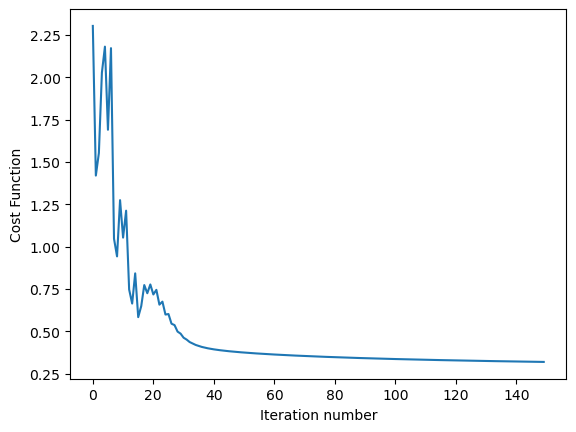

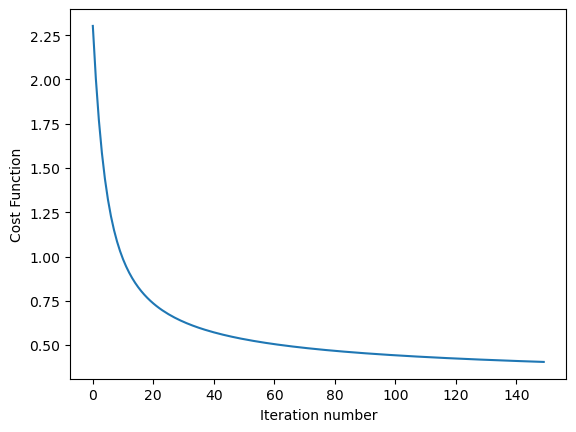

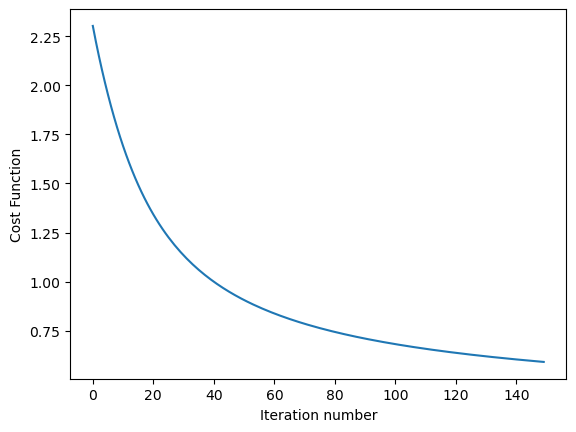

softmax test_error= {0.5: 0.08399999999999996, 1.0: 0.10050000000000003, 2.0: 0.1261}


In [5]:
#######################################################################
# 4. Multinomial (Softmax) Regression and Gradient Descent
#######################################################################

# TODO: first fill out functions in softmax.py, or run_softmax_on_MNIST will not work


def run_softmax_on_MNIST(temp_parameters=[0.5, 1.0, 2.0]):
    """
    Trains softmax, classifies test data, computes test error, and plots cost function

    Runs softmax_regression on the MNIST training set and computes the test error using
    the test set. It uses the following values for parameters:
    alpha = 0.3
    lambda = 1e-4
    num_iterations = 150

    Saves the final theta to ./theta.pkl.gz

    Returns:
        Final test error
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    test_errors = {}

    for temp_param in temp_parameters:
        theta, cost_function_history = softmax_regression(train_x, train_y, temp_param, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)
        plot_cost_function_over_time(cost_function_history)
        test_error = compute_test_error(test_x, test_y, theta, temp_param)
        test_errors[temp_param] = test_error
    return test_errors


print('softmax test_error=', run_softmax_on_MNIST(temp_parameters=[0.5, 1.0, 2.0]))

# TODO: Find the error rate for temp_parameter = [.5, 1.0, 2.0]
#      Remember to return the tempParameter to 1, and re-run run_softmax_on_MNIST

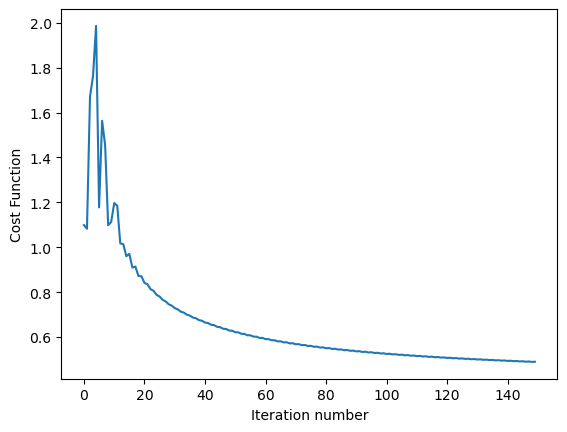

Error rate for digit (mod 3) classifications: 0.18810000000000004


In [6]:
def run_softmax_on_MNIST_mod3(temp_parameter=1):
    """
    Trains Softmax regression on digit (mod 3) classifications.
    See run_softmax_on_MNIST for more info.
    """
    train_x, train_y, test_x, test_y = get_MNIST_data()
    
    # Convert the labels to digit (mod 3) classifications
    train_y_mod3 = train_y % 3
    test_y_mod3 = test_y % 3
    
    # Train softmax regression on mod 3 classifications
    theta, cost_function_history = softmax_regression(train_x, train_y_mod3, temp_parameter, alpha=0.3, lambda_factor=1.0e-4, k=3, num_iterations=150)
    
    # Plot cost function over time
    plot_cost_function_over_time(cost_function_history)
    
    # Compute test error for mod 3 classifications
    test_error_mod3 = compute_test_error(test_x, test_y_mod3, theta, temp_parameter)
    
    return test_error_mod3

# Run run_softmax_on_MNIST_mod3() and report the error rate
error_rate_mod3 = run_softmax_on_MNIST_mod3(temp_parameter=1)
print('Error rate for digit (mod 3) classifications:', error_rate_mod3)


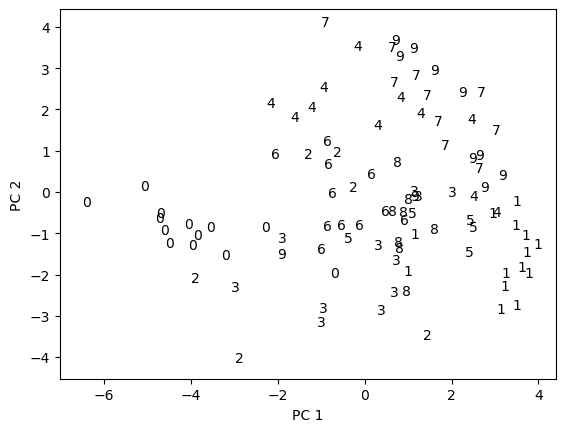

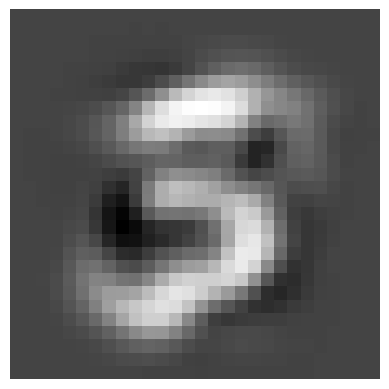

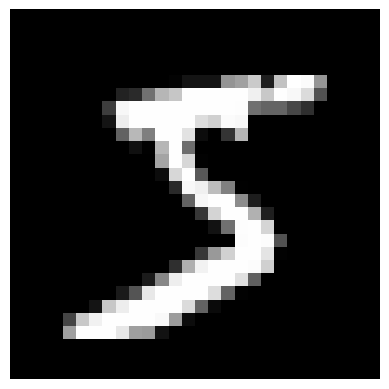

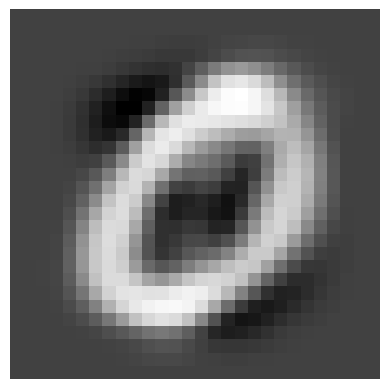

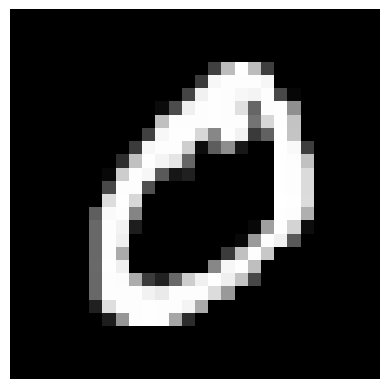

In [8]:
#######################################################################
# 7. Classification Using Manually Crafted Features
#######################################################################

## Dimensionality reduction via PCA ##

# TODO: First fill out the PCA functions in features.py as the below code depends on them.


n_components = 18

###Correction note:  the following 4 lines have been modified since release.
train_x_centered, feature_means = center_data(train_x)
pcs = principal_components(train_x_centered)
train_pca = project_onto_PC(train_x, pcs, n_components, feature_means)
test_pca = project_onto_PC(test_x, pcs, n_components, feature_means)

# train_pca (and test_pca) is a representation of our training (and test) data
# after projecting each example onto the first 18 principal components.


# TODO: Train your softmax regression model using (train_pca, train_y)
#       and evaluate its accuracy on (test_pca, test_y).


# TODO: Use the plot_PC function in features.py to produce scatterplot
#       of the first 100 MNIST images, as represented in the space spanned by the
#       first 2 principal components found above.
plot_PC(train_x[range(000, 100), ], pcs, train_y[range(000, 100)], feature_means)#feature_means added since release


# TODO: Use the reconstruct_PC function in features.py to show
#       the first and second MNIST images as reconstructed solely from
#       their 18-dimensional principal component representation.
#       Compare the reconstructed images with the originals.
firstimage_reconstructed = reconstruct_PC(train_pca[0, ], pcs, n_components, train_x, feature_means)#feature_means added since release
plot_images(firstimage_reconstructed)
plot_images(train_x[0, ])

secondimage_reconstructed = reconstruct_PC(train_pca[1, ], pcs, n_components, train_x, feature_means)#feature_means added since release
plot_images(secondimage_reconstructed)
plot_images(train_x[1, ])


In [10]:
from sklearn.decomposition import PCA

# Assuming you have the training and test sets stored in train_x and test_x variables respectively

# Create an instance of PCA with n_components set to 10
pca = PCA(n_components=10)

# Fit the PCA model on the training data and transform both training and test data
train_pca10 = pca.fit_transform(train_x)
test_pca10 = pca.transform(test_x)


In [11]:
## Cubic Kernel ##
# TODO: Find the 10-dimensional PCA representation of the training and test set


# TODO: First fill out cubicFeatures() function in features.py as the below code requires it.

train_cube = cubic_features(train_pca10)
test_cube = cubic_features(test_pca10)
# train_cube (and test_cube) is a representation of our training (and test) data
# after applying the cubic kernel feature mapping to the 10-dimensional PCA representations.


# TODO: Train your softmax regression model using (train_cube, train_y)
#       and evaluate its accuracy on (test_cube, test_y).


# Train the softmax regression model using the cubic features and labels
theta_cube, cost_function_history_cube = softmax_regression(train_cube, train_y, temp_parameter=1, alpha=0.3, lambda_factor=1.0e-4, k=10, num_iterations=150)

# Compute the test error using the trained model and the cubic features
test_error_cube = compute_test_error(test_cube, test_y, theta_cube, temp_parameter=1)

print('Error rate for 10-dimensional cubic PCA features:', test_error_cube)

d:\Data science\github\MITx\mnist\part1\softmax.py:64: RuntimeWarning: divide by zero encountered in log
  non_regulizing_cost = np.sum(np.log(selected_probabilities))


Error rate for 10-dimensional cubic PCA features: 0.08650000000000002
